In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import *
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fftpack
import scipy.signal
import scipy.io.wavfile
from matplotlib.pyplot import figure
import copy

[-3.    -2.999 -2.998 ...  2.998  2.999  3.   ]


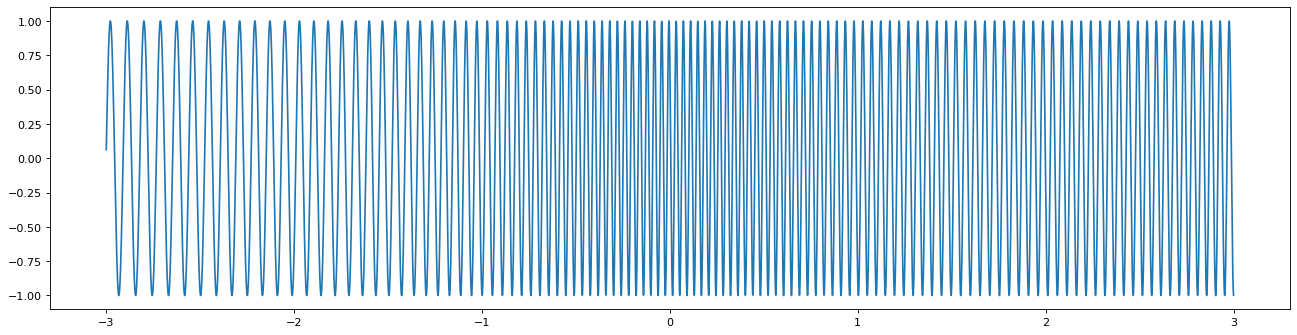

In [37]:
matdata = sio.loadmat('spectral_codeChallenge.mat')

signal = matdata['signal'][0]
time = matdata['time'][0]
srate = matdata['srate'][0][0]
npnts =  len(time)
print(time)
figure(figsize=(20, 5), dpi=80)
plt.plot(time,signal)

In [38]:
print(signal.shape)
print(time.shape)
print(srate)

(6001,)
(6001,)
1000


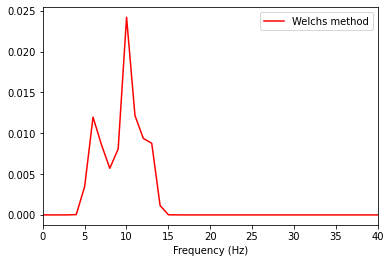

(12,)
(500,)
(12, 500)
(500, 12)


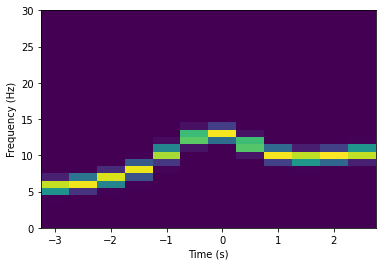

In [39]:
winlength = int(0.5*srate)

winOnsets = np.arange(0, int(len(time)-winlength), int(winlength))

hzW = np.linspace(0,srate/2, int(np.floor(winlength)))

hannWin = 0.5 - np.cos(2*np.pi*np.linspace(0,1,int(winlength)))/2

signalPow = np.zeros(len(hzW))

listOfFTs = []

matrix = np.zeros((len(winOnsets),len(hzW)))

for wi in range(0, len(winOnsets)):
    dataChunk = signal[winOnsets[wi]:winOnsets[wi]+winlength]
    dataChunk = dataChunk * hannWin
    tmpPow = np.abs(scipy.fftpack.fft(dataChunk)/winlength)**2

    matrix[wi,:] = matrix[wi,:] + tmpPow[0:len(hzW)]
    
    signalPow = signalPow + tmpPow[0:len(hzW)]

signalPow = signalPow / len(winOnsets)

# plotting
plt.plot(hzW,signalPow,'r',label='Welch''s method')
plt.xlim([0,40])
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

times = np.arange(-3.0,3.0,0.5)

print(times.shape)
print(hzW.shape)
print(matrix.shape)
print(np.transpose(matrix).shape)

plt.pcolormesh(times, hzW, np.transpose(matrix))
plt.ylim([0,30])
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.show()

(26,)
(129,)
[   0.           23.44140625   46.8828125    70.32421875   93.765625
  117.20703125  140.6484375   164.08984375  187.53125     210.97265625
  234.4140625   257.85546875  281.296875    304.73828125  328.1796875
  351.62109375  375.0625      398.50390625  421.9453125   445.38671875
  468.828125    492.26953125  515.7109375   539.15234375  562.59375
  586.03515625  609.4765625   632.91796875  656.359375    679.80078125
  703.2421875   726.68359375  750.125       773.56640625  797.0078125
  820.44921875  843.890625    867.33203125  890.7734375   914.21484375
  937.65625     961.09765625  984.5390625  1007.98046875 1031.421875
 1054.86328125 1078.3046875  1101.74609375 1125.1875     1148.62890625
 1172.0703125  1195.51171875 1218.953125   1242.39453125 1265.8359375
 1289.27734375 1312.71875    1336.16015625 1359.6015625  1383.04296875
 1406.484375   1429.92578125 1453.3671875  1476.80859375 1500.25
 1523.69140625 1547.1328125  1570.57421875 1594.015625   1617.45703125
 1640.898

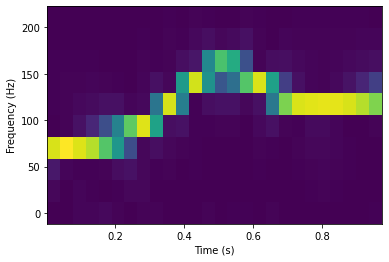

In [40]:

frex,time,pwr = scipy.signal.spectrogram(signal, npnts)

print(np.shape(time))
# print(time)
print(np.shape(frex))
print(frex)
slice = pwr[0:10,:]
print(np.shape(pwr))

plt.pcolormesh(time,frex[0:10],slice)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.show()